### SI100B Python Project (Fall, 2021): 
# Single Cell RNA Sequencing Data Processing - Week 3
*******

Author: `Qi Qin`

Email: `qinqi@shanghaitech.edu.cn` | Update: `2021-12` 

### Introduction

In the last week, we successfully read in the dataset of scRNA-seq and performed a simple pre-processing. In this week, we will try to perform further dimensionality reduction and clustering operations on the data to demonstrate some simple analysis of scRNA-seq.

This notebook works as a workspace where you can verify your implementation. Only your work in `scrna/analysis.py` will be graded.
<br/><br/>

In this week, you are expected to:
 - **Section1**: Know how to use `sklearn` to perform dimensionality reduction (10 points).
 - **Section2**: Know how to visualize the dimensionality reduction result (10 points).
 - **Section3**: Know how to perform clustering and evaluate the performance of clustering by several metrics (10 points).
 - **Have fun!**
 
**NOTE**: Please do not try to cheat local judge by modifying its codes or directly assigning the answer.
If you do so, you still cannot pass the online judge.

**Run the cell below to import necessary packages and functions.**

In [1]:
# IMPORTANT: run this cell before runnng any cell to activate auto re-import
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

# plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'

In [2]:
from scrna.io import generate_df
from scrna.preprocess import filter_genes, filter_cells

df = generate_df("data/testdata/matrix.mtx", "data/testdata/genes.tsv", "data/testdata/barcodes.tsv")[:2000]
df

genes,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2,AL590523.1,CT476828.1,PNRC2,SRSF10,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
barcodes,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Implement your own quality control process here based on your observation of the new dataset
# The following thresholds are just an example.

filtered_df = filter_genes(df, min_cells=3)
filtered_df = filter_cells(filtered_df, min_genes=200)
filtered_df = filter_cells(filtered_df, max_genes=2500)

assert filtered_df.shape[0] > df.shape[0]*0.9, "You should keep at least 90% of the cells"

filtered_df

genes,AL627309.1,RP11-206L10.2,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,C1orf159,TNFRSF18,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,PNRC2,SRSF10
barcodes,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,4,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,11,2,0,7,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,4,1,0,3,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,1,0,5,0,0,3,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,1,0,6,0,0,1,0,0,0,0


## Section 1: Dimensionality reduction (10 points)
****

We aim in scRNA-seq to compare cells based on their expressions of genes, e.g. to identify similar transcriptomic profiles. Each gene represents then a dimension of the data.

With a dataset of 2 genes, we could make a 2-dimensional plot where each point is a cell and each axis is the expression of one gene. For datasets with thousands of genes, the concept is the same: each cell’s expression profile defines its location in the high-dimensional expression space.

Expressions of different genes are correlated if they are affected by the same biological process. The separate information for these individual genes do not need to be stored, but can instead be compressed into a single dimension, e.g. an “eigengene”. Dimensionality reduction aims then to reduce the number of separate dimensions in the data and then:

- reduces the computational work in downstream analyses to only a few dimensions
- reduces noise by averaging across multiple genes to obtain a more precise representation of the patterns in the data
- enables effective plotting of the data.

API stands for Application Programming Interface, and making good use of it can save you a lot of effort. In this task, you will learn how to use the APIs in [Scikit-learn](https://scikit-learn.org/stable/) — a free software machine learning library for the Python programming language supporting various classification, regression and clustering algorithms — which means you will not have to implement the dimensionality reduction algorithm yourself!

**Complete code at `scrna/analysis.py/pca` and `scrna/analysis.py/tsne`**, where you may see more details.

In [4]:
# Local Test - Section 1.1
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.analysis import pca

pca_result = pca(filtered_df)

assert pca_result.shape[1] == 2
assert pca_result.shape[0] == filtered_df.shape[0]
print("You pass the local test - Section 1.1 (5%)")
pca_result

You pass the local test - Section 1.1 (5%)


,PC0,PC1
barcodes,,
0,0.476172,-6.824433
1,-32.075717,-15.055619
2,162.548315,-0.363662
3,-31.272295,20.887346
4,-40.042668,-10.714576
...,...,...
1995,15.867487,-6.429609
1996,-60.387248,-5.306520
1997,-45.290665,14.106037


In [5]:
# Local Test - Section 1.2
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.analysis import tsne

tsne_result = tsne(filtered_df)

assert tsne_result.shape[1] == 2
assert tsne_result.shape[0] == filtered_df.shape[0]
print("You pass the local test - Section 1.2 (5%)")
tsne_result

You pass the local test - Section 1.2 (5%)


,PC0,PC1
barcodes,,
0,-16.528500,-9.195319
1,-9.206186,6.616346
2,48.213367,-7.623169
3,-15.790246,14.753409
4,-5.876638,10.627131
...,...,...
1995,40.988464,6.031407
1996,-58.374828,0.964101
1997,0.501464,29.046007


## Section 2: Visualization (10 points)
****
One application of dimensionality reduction is to compress the data for plotting into 2 (sometimes 3) dimensions with the most salient features of the data.

**Complete code at `scrna/analysis.py/visualize`.**

In [6]:
ground_truth = pd.read_csv("data/testdata/ground_truth.csv")
ground_truth

,barcodes,label
0,0,cd4_t_helper
1,1,regulatory_t
2,2,cd14_monocytes
3,3,cd4_t_helper
4,4,naive_t
...,...,...
1995,1995,b_cells
1996,1996,cd14_monocytes
1997,1997,cd56_nk
1998,1998,naive_t


You pass the local test - Section 2.1 (5%)


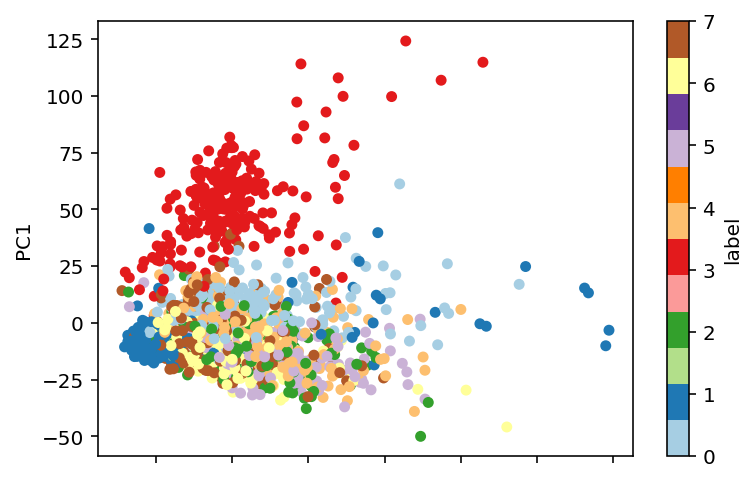

In [14]:
from scrna.analysis import visualize
visualize(pca_result, label = ground_truth)
print("You pass the local test - Section 2.1 (5%)")

You pass the local test - Section 2.2 (5%)


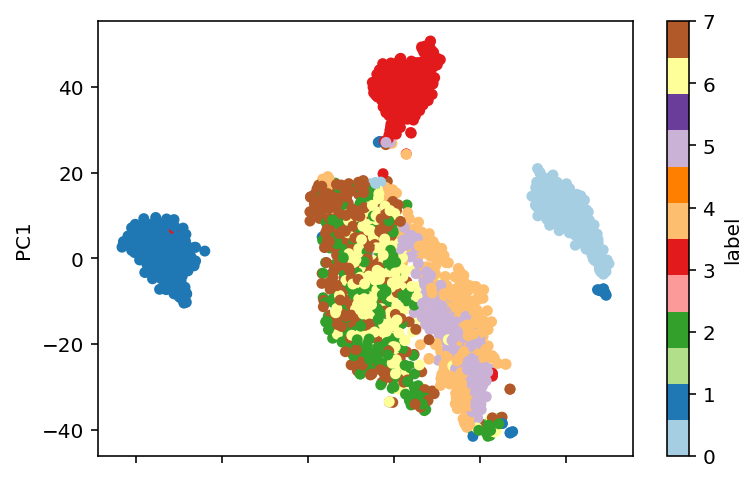

In [8]:
visualize(tsne_result, label = ground_truth)
print("You pass the local test - Section 2.2 (5%)")

According to the figures above, PCA performs poorly in neibourhood preserving. That's because of the horseshoe effect of PCA, which always happens when the input data is non-linear. Due to this effect, the second PC (principal component) is twisted relative to the first PC which leads to indistinguishable cell clusters. A common solution is to perform normalization and log-transformation before the dimensionality reduction step.

## Section 3: Clustering (10 points)

In the PC projection, we saw some subpopulations of cells emerging. We would like now to empirically define these subpopulation of cells with similar expression profiles using KMeans **clustering**.

Clustering summarizes the data and allows us to describe the population heterogeneity in terms of discrete and easily understandable labels. The subpopulations can be afterwards treated as proxies for biological objects like cell types or states.

Again, you still don't need to implement your own clustering algorithm, just call the sklearn api instead.

### Section 3.1: Perform clustering (5 points)

**Complete code at `scrna/analysis.py**

You pass the local test - Section 3.1 (5%)


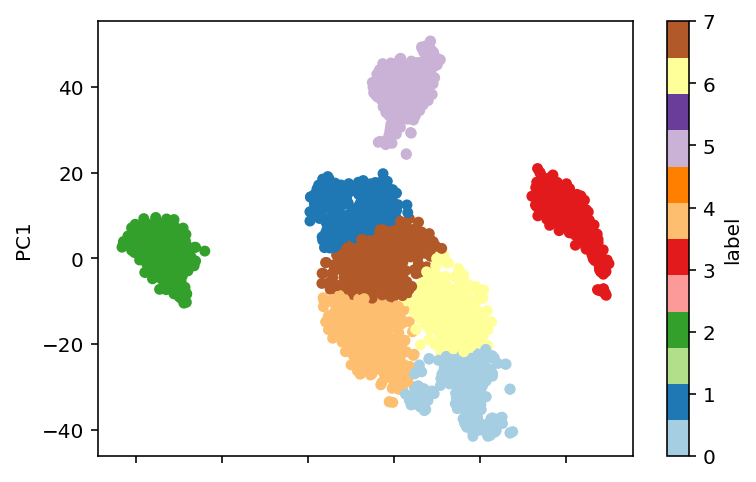

In [9]:
# Local Test - Section 2.2
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.analysis import cluster

cluster_result = cluster(tsne_result, 8)

assert cluster_result.shape[1] == 1
assert cluster_result.shape[0] == filtered_df.shape[0]
visualize(tsne_result, label = cluster_result)
print("You pass the local test - Section 3.1 (5%)")

### Section 3.2: Evaluate the clustering performance (5 points)

In [10]:
# Local Test - Section 2.4
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.analysis import evaluate

pca_nmi, pca_ari = evaluate(cluster(pca_result, 8), ground_truth)
tsne_nmi, tsne_ari = evaluate(cluster(tsne_result, 8), ground_truth)

print(pca_nmi, pca_ari)
print(tsne_nmi, tsne_ari)

assert 0 < pca_nmi < tsne_nmi < 1
assert 0 < pca_ari < tsne_ari < 1
print("You pass the local test - Section 3.2 (5%)")

0.264943644068184 0.17163126729368638
0.589517950819726 0.4793393600926373
You pass the local test - Section 3.2 (5%)


## Reference
```
[1] Clustering 3K PBMCs with Scanpy https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/scrna-scanpy-pbmc3k/tutorial.html
[2] Preprocessing and clustering 3k PBMCs https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
```